In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
ds = xr.open_dataset("/scratch/b/b382635/tobac_tracks/anatomy_example_large/20210701/tobac_20210701T0000_20210702T0000_system_mask_linked_processed.nc")

In [3]:
ds

<xarray.Dataset> Size: 3GB
Dimensions:              (time: 95, level_full: 50, lat: 100, lon: 120)
Coordinates:
  * time                 (time) datetime64[ns] 760B 2021-07-01T00:15:00 ... 2...
  * level_full           (level_full) int32 200B 41 42 43 44 45 ... 87 88 89 90
  * lat                  (lat) float64 800B 7.0 7.1 7.2 7.3 ... 16.7 16.8 16.9
  * lon                  (lon) float64 960B -80.0 -79.9 -79.8 ... -68.2 -68.1
Data variables:
    convective           (time, level_full, lat, lon) float64 456MB ...
    updraft_features     (time, level_full, lat, lon) float64 456MB ...
    convective_features  (time, level_full, lat, lon) float64 456MB ...
    anvil_features       (time, level_full, lat, lon) float64 456MB ...
    system               (time, level_full, lat, lon) float64 456MB ...
    core                 (time, level_full, lat, lon) float64 456MB ...
    anvil                (time, level_full, lat, lon) float64 456MB ...
    meets_requirements   (time, level_full, lat, lon) bool 57MB ...

In [4]:
ds.core.isel(time=0)

<xarray.DataArray 'core' (level_full: 50, lat: 100, lon: 120)> Size: 5MB
[600000 values with dtype=float64]
Coordinates:
    time        datetime64[ns] 8B 2021-07-01T00:15:00
  * level_full  (level_full) int32 200B 41 42 43 44 45 46 ... 85 86 87 88 89 90
  * lat         (lat) float64 800B 7.0 7.1 7.2 7.3 7.4 ... 16.6 16.7 16.8 16.9
  * lon         (lon) float64 960B -80.0 -79.9 -79.8 -79.7 ... -68.3 -68.2 -68.1

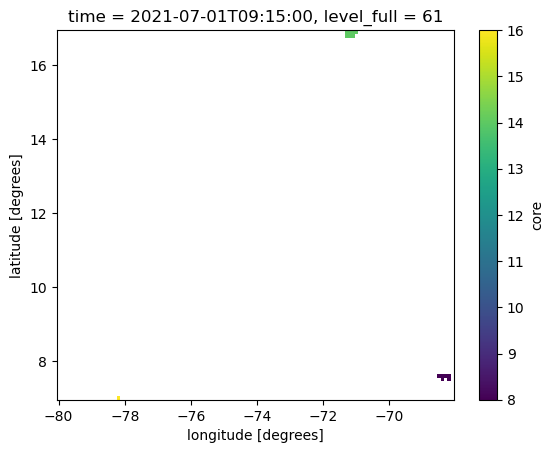

In [5]:
ds.core.isel(time=36, level_full=20).plot()

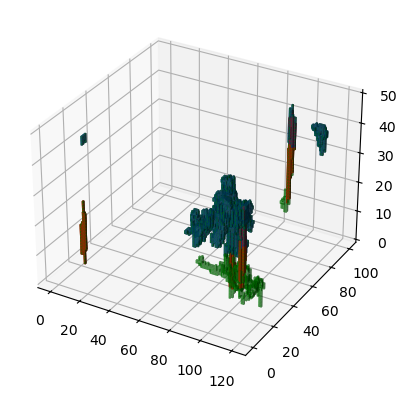

In [6]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
core_voxel = ax.voxels(ds.core.isel(time=36).values.transpose([2,1,0])[...,::-1]>0, facecolors="red", alpha=1)
anvil_voxel = ax.voxels(ds.anvil.isel(time=36).values.transpose([2,1,0])[...,::-1]>0, facecolors="blue", alpha=0.5)
system_voxel = ax.voxels(ds.system.isel(time=36).values.transpose([2,1,0])[...,::-1]>0, facecolors="green", alpha=0.5)


In [7]:
ds.core.isel(time=36).values.transpose([2,1,0]).shape

(120, 100, 50)

In [8]:
import warnings
import pathlib
from datetime import datetime, timedelta

import numpy as np
import pandas as pd
import xarray as xr

import matplotlib.pyplot as plt
import cartopy.crs as ccrs

import intake
import healpy

In [9]:
cat = intake.open_catalog(
    '/work/bm1235/k203123/nextgems_prefinal/experiments/ngc4008a/outdata/ngc4008a.yaml'
)
ds_icon_inst = cat.ngc4008a(chunks="auto", zoom=9, time='PT15M').to_dask()
ds_icon_inst_1 = ds_icon_inst.sel(time=slice('2021-07-01-00:00:00', '2021-07-02-00:00:00'), level_full=ds.level_full)


/home/b/b382728/miniconda3/envs/tobac/lib/python3.12/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


In [10]:
ds_icon_inst_1

<xarray.Dataset> Size: 720GB
Dimensions:     (time: 96, level_full: 50, cell: 3145728, crs: 1, level_half: 91)
Coordinates:
  * crs         (crs) float32 4B nan
  * level_full  (level_full) int32 200B 41 42 43 44 45 46 ... 85 86 87 88 89 90
  * level_half  (level_half) int32 364B 1 2 3 4 5 6 7 8 ... 85 86 87 88 89 90 91
  * time        (time) datetime64[ns] 768B 2021-07-01T00:15:00 ... 2021-07-02
    zg          (level_full, cell) float32 629MB dask.array<chunksize=(45, 524288), meta=np.ndarray>
    zghalf      (level_half, cell) float32 1GB dask.array<chunksize=(62, 524288), meta=np.ndarray>
Dimensions without coordinates: cell
Data variables: (12/15)
    cli         (time, level_full, cell) float32 60GB dask.array<chunksize=(1, 30, 262144), meta=np.ndarray>
    clw         (time, level_full, cell) float32 60GB dask.array<chunksize=(1, 30, 262144), meta=np.ndarray>
    dzghalf     (level_full, cell) float32 629MB dask.array<chunksize=(45, 524288), meta=np.ndarray>
    hus         (time, level_full, cell) float32 60GB dask.array<chunksize=(1, 30, 262144), meta=np.ndarray>
    pfull       (time, level_full, cell) float32 60GB dask.array<chunksize=(1, 30, 262144), meta=np.ndarray>
    pr          (time, cell) float32 1GB dask.array<chunksize=(32, 524288), meta=np.ndarray>
    ...          ...
    rlut        (time, cell) float32 1GB dask.array<chunksize=(32, 524288), meta=np.ndarray>
    ta          (time, level_full, cell) float32 60GB dask.array<chunksize=(1, 30, 262144), meta=np.ndarray>
    ts          (time, cell) float32 1GB dask.array<chunksize=(32, 524288), meta=np.ndarray>
    ua          (time, level_full, cell) float32 60GB dask.array<chunksize=(1, 30, 262144), meta=np.ndarray>
    va          (time, level_full, cell) float32 60GB dask.array<chunksize=(1, 30, 262144), meta=np.ndarray>
    wa_phy      (time, level_half, cell) float32 110GB dask.array<chunksize=(1, 31, 262144), meta=np.ndarray>

In [11]:
pix = xr.DataArray(
    healpy.ang2pix(ds_icon_inst_1.crs.healpix_nside, *np.meshgrid(ds.lon, ds.lat), nest=True, lonlat=True),
    coords=(ds.lat, ds.lon),
)


In [12]:
pix

<xarray.DataArray (lat: 100, lon: 120)> Size: 96kB
array([[1949239, 1949282, 1949280, ..., 1953358, 1953356, 1953357],
       [1949288, 1949288, 1949283, ..., 1953380, 1953359, 1953368],
       [1949291, 1949289, 1949292, ..., 1953381, 1953392, 1953370],
       ...,
       [2051639, 2051637, 2051680, ..., 1965641, 1965644, 1965638],
       [2051645, 2051682, 2051681, ..., 1965646, 1965645, 1965645],
       [2051688, 2051689, 2051683, ..., 1965669, 1965647, 1965658]])
Coordinates:
  * lat      (lat) float64 800B 7.0 7.1 7.2 7.3 7.4 ... 16.5 16.6 16.7 16.8 16.9
  * lon      (lon) float64 960B -80.0 -79.9 -79.8 -79.7 ... -68.3 -68.2 -68.1

In [13]:
icon_regrid = ds_icon_inst_1.isel(cell=pix)

In [14]:
icon_regrid

<xarray.Dataset> Size: 3GB
Dimensions:     (time: 96, level_full: 50, lat: 100, lon: 120, crs: 1,
                 level_half: 91)
Coordinates:
  * crs         (crs) float32 4B nan
  * level_full  (level_full) int32 200B 41 42 43 44 45 46 ... 85 86 87 88 89 90
  * level_half  (level_half) int32 364B 1 2 3 4 5 6 7 8 ... 85 86 87 88 89 90 91
  * time        (time) datetime64[ns] 768B 2021-07-01T00:15:00 ... 2021-07-02
    zg          (level_full, lat, lon) float32 2MB dask.array<chunksize=(45, 100, 120), meta=np.ndarray>
    zghalf      (level_half, lat, lon) float32 4MB dask.array<chunksize=(62, 100, 120), meta=np.ndarray>
  * lat         (lat) float64 800B 7.0 7.1 7.2 7.3 7.4 ... 16.6 16.7 16.8 16.9
  * lon         (lon) float64 960B -80.0 -79.9 -79.8 -79.7 ... -68.3 -68.2 -68.1
Data variables: (12/15)
    cli         (time, level_full, lat, lon) float32 230MB dask.array<chunksize=(1, 30, 100, 120), meta=np.ndarray>
    clw         (time, level_full, lat, lon) float32 230MB dask.array<chunksize=(1, 30, 100, 120), meta=np.ndarray>
    dzghalf     (level_full, lat, lon) float32 2MB dask.array<chunksize=(45, 100, 120), meta=np.ndarray>
    hus         (time, level_full, lat, lon) float32 230MB dask.array<chunksize=(1, 30, 100, 120), meta=np.ndarray>
    pfull       (time, level_full, lat, lon) float32 230MB dask.array<chunksize=(1, 30, 100, 120), meta=np.ndarray>
    pr          (time, lat, lon) float32 5MB dask.array<chunksize=(32, 100, 120), meta=np.ndarray>
    ...          ...
    rlut        (time, lat, lon) float32 5MB dask.array<chunksize=(32, 100, 120), meta=np.ndarray>
    ta          (time, level_full, lat, lon) float32 230MB dask.array<chunksize=(1, 30, 100, 120), meta=np.ndarray>
    ts          (time, lat, lon) float32 5MB dask.array<chunksize=(32, 100, 120), meta=np.ndarray>
    ua          (time, level_full, lat, lon) float32 230MB dask.array<chunksize=(1, 30, 100, 120), meta=np.ndarray>
    va          (time, level_full, lat, lon) float32 230MB dask.array<chunksize=(1, 30, 100, 120), meta=np.ndarray>
    wa_phy      (time, level_half, lat, lon) float32 419MB dask.array<chunksize=(1, 31, 100, 120), meta=np.ndarray>

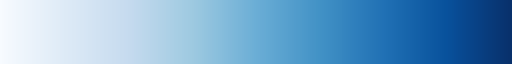

In [15]:
from matplotlib.colors import ListedColormap
plt.cm.Blues

In [16]:
blues_trans = plt.cm.Blues(np.linspace(0,1,256))
blues_trans[:,-1] = np.linspace(0,1,256)
blues_trans = ListedColormap(blues_trans)

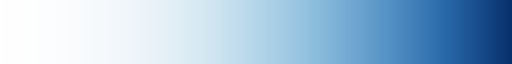

In [17]:
blues_trans

In [18]:
icon_regrid.cli.isel(time=36)

<xarray.DataArray 'cli' (level_full: 50, lat: 100, lon: 120)> Size: 2MB
dask.array<getitem, shape=(50, 100, 120), dtype=float32, chunksize=(30, 100, 120), chunktype=numpy.ndarray>
Coordinates:
  * level_full  (level_full) int32 200B 41 42 43 44 45 46 ... 85 86 87 88 89 90
    time        datetime64[ns] 8B 2021-07-01T09:15:00
    zg          (level_full, lat, lon) float32 2MB dask.array<chunksize=(45, 100, 120), meta=np.ndarray>
  * lat         (lat) float64 800B 7.0 7.1 7.2 7.3 7.4 ... 16.6 16.7 16.8 16.9
  * lon         (lon) float64 960B -80.0 -79.9 -79.8 -79.7 ... -68.3 -68.2 -68.1
Attributes:
    cell_methods:  time: point
    component:     atmo
    grid_mapping:  crs
    long_name:     specific cloud ice content
    units:         kg kg-1
    vgrid:         reference

In [19]:
icon_regrid.cli.isel(time=36).max().compute()

<xarray.DataArray 'cli' ()> Size: 4B
array(0.00113523, dtype=float32)
Coordinates:
    time     datetime64[ns] 8B 2021-07-01T09:15:00

In [20]:
cli = icon_regrid.cli.isel(time=36).values.transpose([2,1,0])[...,::-1]

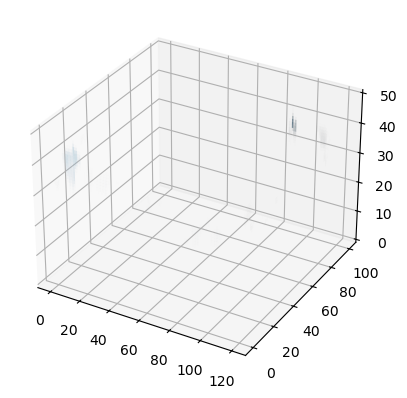

In [21]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

voxels = np.ones(cli.shape)
voxel_colours = blues_trans(np.clip(cli*1e3, 0, 1))
cli_vox = ax.voxels(voxels, facecolors=voxel_colours)

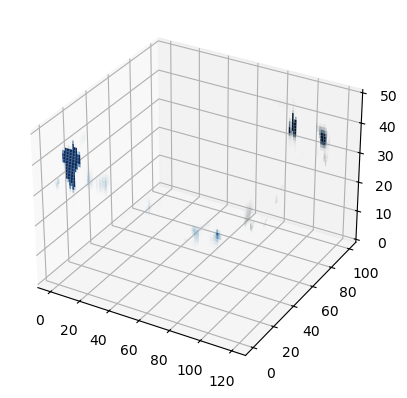

In [22]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

voxels = np.ones(cli.shape)
voxel_colours = blues_trans(np.clip(cli*1e4, 0, 1))
cli_vox = ax.voxels(voxels, facecolors=voxel_colours)

In [23]:
np.log10(0.001)

-3.0

/tmp/ipykernel_458618/3498855399.py:3: RuntimeWarning: divide by zero encountered in log10
  voxel_colours = blues_trans(np.clip((np.log10(cli)+6)/3, 0, 1))


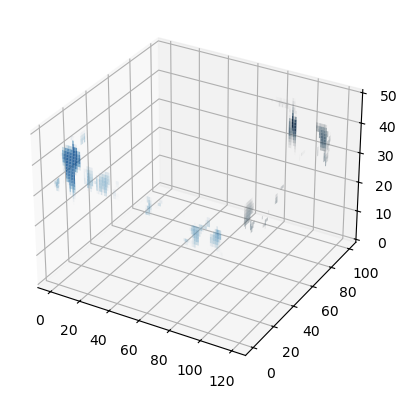

In [24]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
voxels = np.ones(cli.shape)
voxel_colours = blues_trans(np.clip((np.log10(cli)+6)/3, 0, 1))
cli_vox = ax.voxels(voxels, facecolors=voxel_colours)

/tmp/ipykernel_458618/4046500574.py:3: RuntimeWarning: divide by zero encountered in log10
  voxel_colours = blues_trans(np.clip((np.log10(cli)+6)/3, 0, 1))


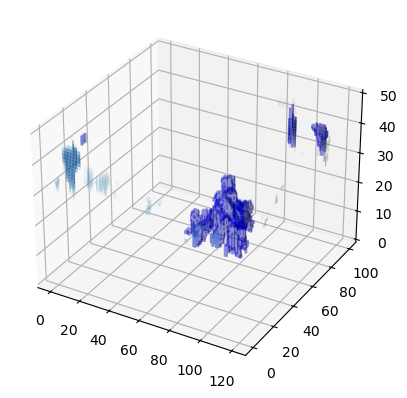

In [25]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
voxels = np.ones(cli.shape)
voxel_colours = blues_trans(np.clip((np.log10(cli)+6)/3, 0, 1))
cli_vox = ax.voxels(voxels, facecolors=voxel_colours)

anvil_voxel = ax.voxels(ds.anvil.isel(time=36).values.transpose([2,1,0])[...,::-1]>0, facecolors="blue", alpha=0.25)


In [26]:
cli = icon_regrid.cli.isel(time=36).values.transpose([1,2,0])
clw = icon_regrid.clw.isel(time=36).values.transpose([1,2,0])
precip = (
    icon_regrid.qg.isel(time=36).values
    + icon_regrid.qr.isel(time=36).values
    + icon_regrid.qs.isel(time=36).values
).transpose([1,2,0])

In [27]:
cli_cmap = plt.cm.Blues(np.linspace(0,1,256))
cli_cmap[:,-1] = np.linspace(0,1,256)
cli_cmap = ListedColormap(cli_cmap)

clw_cmap = plt.cm.Greys(np.linspace(0,0.5,256))
clw_cmap[:,-1] = np.linspace(0,1,256)
clw_cmap = ListedColormap(clw_cmap)

precip_cmap = plt.cm.RdPu(np.linspace(0,1,256))
precip_cmap[:,-1] = np.linspace(0,1,256)
precip_cmap = ListedColormap(precip_cmap)


In [28]:
bg_image = plt.imread("/home/b/b382728/data/world.200407.3x21600x10800.png")

In [29]:
bg_image.shape

(10800, 21600, 3)

In [30]:
lat_bounds = [6.95, 16.95]
lon_bounds = [-80.05, -68.05]

In [31]:
img_y_bounds = [int(np.round((90-lb)/180*10800)) for lb in lat_bounds]
img_x_bounds = [int(np.round((lb+180)/360*21600)) for lb in lon_bounds]
img_y_bounds, img_x_bounds

([4983, 4383], [5997, 6717])

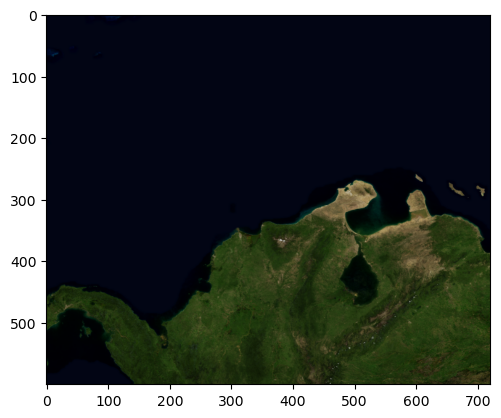

In [32]:
plt.imshow(bg_image[img_y_bounds[1]:img_y_bounds[0], img_x_bounds[0]:img_x_bounds[1]], origin="upper")

In [33]:
bg_image = bg_image[img_y_bounds[1]:img_y_bounds[0], img_x_bounds[0]:img_x_bounds[1]]


In [34]:
bg_image.shape

(600, 720, 3)

In [35]:
cli.shape

(100, 120, 50)

In [36]:
# fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
bg_lats = np.linspace(lat_bounds[1], lat_bounds[0], bg_image.shape[0])
bg_lons = np.linspace(lon_bounds[0], lon_bounds[1], bg_image.shape[1])


In [37]:
np.meshgrid(bg_lats, bg_lons, indexing="ij")[0].shape

(600, 720)

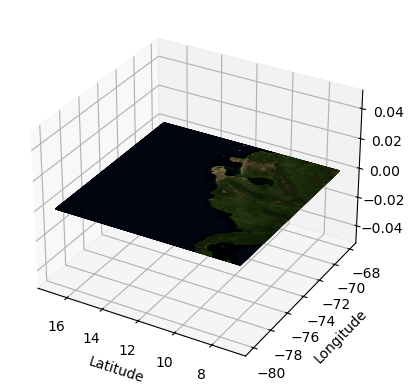

In [38]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(
    *np.meshgrid(bg_lats, bg_lons, indexing="ij"), 
    np.zeros(bg_image.shape[:-1]), 
    rstride=1, cstride=1, 
    facecolors=bg_image
)
ax.set_xlabel("Latitude")
ax.set_ylabel("Longitude")
ax.invert_xaxis()

In [39]:
ds.lat

<xarray.DataArray 'lat' (lat: 100)> Size: 800B
array([ 7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,  7.8,  7.9,  8. ,  8.1,
        8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,  8.9,  9. ,  9.1,  9.2,  9.3,
        9.4,  9.5,  9.6,  9.7,  9.8,  9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5,
       10.6, 10.7, 10.8, 10.9, 11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7,
       11.8, 11.9, 12. , 12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9,
       13. , 13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1,
       14.2, 14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15. , 15.1, 15.2, 15.3,
       15.4, 15.5, 15.6, 15.7, 15.8, 15.9, 16. , 16.1, 16.2, 16.3, 16.4, 16.5,
       16.6, 16.7, 16.8, 16.9])
Coordinates:
  * lat      (lat) float64 800B 7.0 7.1 7.2 7.3 7.4 ... 16.5 16.6 16.7 16.8 16.9
Attributes:
    standard_name:  latitude
    units:          degrees

In [40]:
icon_lats = np.zeros(ds.lat.size + 1)
icon_lats[1:-1] = 0.5 * (ds.lat[:-1].values + ds.lat[1:].values)
icon_lats[0] = ds.lat[0].item() - 0.05
icon_lats[-1] = ds.lat[-1].item() + 0.05

icon_lons = np.zeros(ds.lon.size + 1)
icon_lons[1:-1] = 0.5 * (ds.lon[:-1].values + ds.lon[1:].values)
icon_lons[0] = ds.lon[0].item() + 0.05
icon_lons[-1] = ds.lon[-1].item() - 0.05

vox_h = np.zeros(icon_lats.shape + icon_lons.shape + (51,))
vox_h[:-1,:-1] = icon_regrid.zghalf.isel(level_half=slice(40, None)).values.transpose([1,2,0])
vox_h[1:,1:] += vox_h[:-1,:-1] 
vox_h[1:-1,1:-1] *= 0.5

vox_lats, vox_lons = np.meshgrid(icon_lats, icon_lons, indexing="ij")
vox_lats = np.stack([vox_lats] * vox_h.shape[-1], axis=-1)
vox_lons = np.stack([vox_lons] * vox_h.shape[-1], axis=-1)

In [41]:
vox_h.shape

(101, 121, 51)

/tmp/ipykernel_458618/2708890566.py:16: RuntimeWarning: divide by zero encountered in log10
  facecolors=blues_trans(np.clip((np.log10(cli)+6)/3, 0, 1))


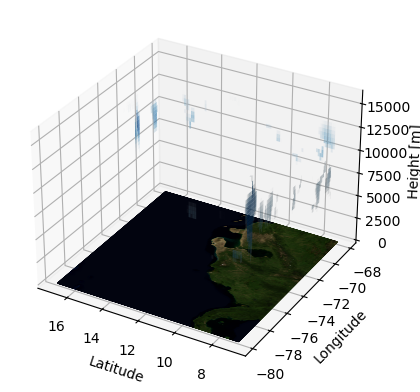

In [42]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(
    *np.meshgrid(bg_lats, bg_lons, indexing="ij"), 
    np.zeros(bg_image.shape[:-1]), 
    rstride=1, cstride=1, 
    facecolors=bg_image
)
ax.set_xlabel("Latitude")
ax.set_ylabel("Longitude")
ax.set_zlabel("Height [m]")
ax.invert_xaxis()

voxels = np.ones(cli.shape)
cli_vox = ax.voxels(
    vox_lats, vox_lons, vox_h, voxels, 
    facecolors=blues_trans(np.clip((np.log10(cli)+6)/3, 0, 1))
)

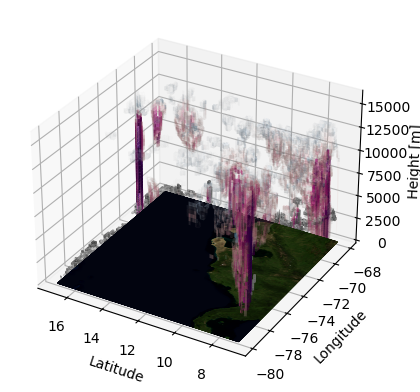

In [43]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(
    *np.meshgrid(bg_lats, bg_lons, indexing="ij"), 
    np.zeros(bg_image.shape[:-1]), 
    rstride=1, cstride=1, 
    facecolors=bg_image
)
ax.set_xlabel("Latitude")
ax.set_ylabel("Longitude")
ax.set_zlabel("Height [m]")
ax.invert_xaxis()

voxels = np.zeros(cli.shape)
voxel_colours = np.zeros((4,) + cli.shape)

voxels[cli>1e-6] = 1
voxel_colours[:, cli>1e-6] = cli_cmap(np.clip((np.log10(cli[cli>1e-6])+6)/3, 0, 1)).T

voxels[clw>1e-6] = 1
voxel_colours[:, clw>1e-6] = clw_cmap(np.clip((np.log10(clw[clw>1e-6])+6)/3, 0, 1)).T

voxels[precip>1e-6] = 1
voxel_colours[:, precip>1e-6] = precip_cmap(np.clip((np.log10(precip[precip>1e-6])+6)/3, 0, 1)).T

voxel_colours = voxel_colours.transpose(1,2,3,0)

clouds_vox = ax.voxels(
    vox_lats, vox_lons, vox_h, voxels, 
    facecolors=voxel_colours
)


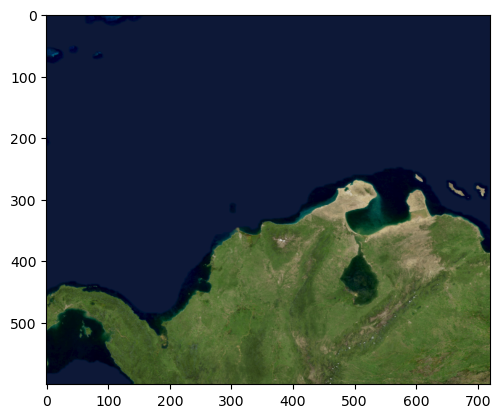

In [44]:
plt.imshow(bg_image**0.6, origin="upper")

/tmp/ipykernel_458618/1049754435.py:29: RuntimeWarning: invalid value encountered in divide
  voxel_colours[:-1] = (


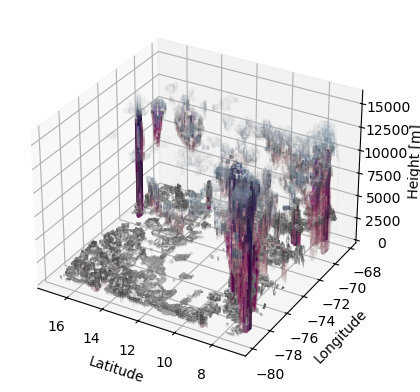

In [45]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# ax.plot_surface(
#     *np.meshgrid(bg_lats, bg_lons, indexing="ij"), 
#     np.zeros(bg_image.shape[:-1]), 
#     rstride=1, cstride=1, 
#     facecolors=bg_image**0.6
# )
ax.set_xlabel("Latitude")
ax.set_ylabel("Longitude")
ax.set_zlabel("Height [m]")
ax.invert_xaxis()

voxels = np.zeros(cli.shape)
voxel_colours = np.zeros((4,) + cli.shape)
voxel_colours_cli = voxel_colours.copy()
voxel_colours_clw = voxel_colours.copy()
voxel_colours_precip = voxel_colours.copy()

voxels[cli>1e-6] = 1
voxel_colours_cli[:, cli>1e-6] += cli_cmap(np.clip((np.log10(cli[cli>1e-6])+6)/3, 0, 1)).T

voxels[clw>1e-6] = 1
voxel_colours_clw[:, clw>1e-6] += clw_cmap(np.clip((np.log10(clw[clw>1e-6])+6)/3, 0, 1)).T

voxels[precip>1e-6] = 1
voxel_colours_precip[:, precip>1e-6] += precip_cmap(np.clip((np.log10(precip[precip>1e-6])+6)/3, 0, 1)).T

voxel_colours[-1] = voxel_colours_cli[-1] + voxel_colours_clw[-1] + voxel_colours_precip[-1]
voxel_colours[:-1] = (
    voxel_colours_cli[:-1] * voxel_colours_cli[-1] 
    + voxel_colours_clw[:-1] * voxel_colours_clw[-1] 
    + voxel_colours_precip[:-1] * voxel_colours_precip[-1]
) / voxel_colours[-1]

voxel_colours = voxel_colours.transpose(1,2,3,0)
voxel_colours = np.clip(voxel_colours, 0, 1)

clouds_vox = ax.voxels(
    vox_lats, vox_lons, vox_h, voxels, 
    facecolors=voxel_colours
)


/tmp/ipykernel_458618/697993027.py:30: RuntimeWarning: invalid value encountered in divide
  voxel_colours[:-1] = (


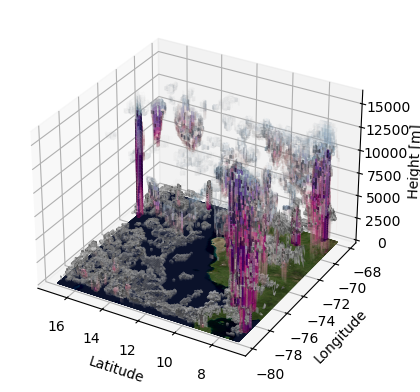

In [46]:
fig, ax = plt.subplots(subplot_kw=dict(projection="3d", computed_zorder=False))
ax.plot_surface(
    *np.meshgrid(bg_lats, bg_lons, indexing="ij"), 
    np.zeros(bg_image.shape[:-1]), 
    rstride=1, cstride=1, 
    facecolors=bg_image**0.6,
    zorder=0
)
ax.set_xlabel("Latitude")
ax.set_ylabel("Longitude")
ax.set_zlabel("Height [m]")
ax.invert_xaxis()

voxels = np.zeros(cli.shape)
voxel_colours = np.zeros((4,) + cli.shape)
voxel_colours_cli = voxel_colours.copy()
voxel_colours_clw = voxel_colours.copy()
voxel_colours_precip = voxel_colours.copy()

voxels[cli>1e-6] = 1
voxel_colours_cli[:, cli>1e-6] += cli_cmap(np.clip((np.log10(cli[cli>1e-6])+6)/3, 0, 1)).T

voxels[clw>1e-6] = 1
voxel_colours_clw[:, clw>1e-6] += clw_cmap(np.clip((np.log10(clw[clw>1e-6])+6)/3, 0, 1)).T

voxels[precip>1e-6] = 1
voxel_colours_precip[:, precip>1e-6] += precip_cmap(np.clip((np.log10(precip[precip>1e-6])+6)/3, 0, 1)).T

voxel_colours[-1] = voxel_colours_cli[-1] + voxel_colours_clw[-1] + voxel_colours_precip[-1]
voxel_colours[:-1] = (
    voxel_colours_cli[:-1] * voxel_colours_cli[-1] 
    + voxel_colours_clw[:-1] * voxel_colours_clw[-1] 
    + voxel_colours_precip[:-1] * voxel_colours_precip[-1]
) / voxel_colours[-1]

voxel_colours = voxel_colours.transpose(1,2,3,0)
voxel_colours = np.clip(voxel_colours, 0, 1)

clouds_vox = ax.voxels(
    vox_lats, vox_lons, vox_h, voxels, 
    facecolors=voxel_colours,
    zorder=1
)


In [47]:
label_voxels = np.zeros(ds.core.isel(time=36).shape)
label_voxel_colours = np.empty(label_voxels.shape, dtype=object)

wh_system = ds.system.isel(time=36).values > 0
label_voxels[wh_system] = 1
label_voxel_colours[wh_system] = "C02"

wh_anvil = ds.anvil.isel(time=36).values > 0
label_voxels[wh_anvil] = 1
label_voxel_colours[wh_anvil] = "C00"

wh_core = ds.core.isel(time=36).values > 0
label_voxels[wh_core] = 1
label_voxel_colours[wh_core] = "C01"

label_voxels = label_voxels.transpose(1,2,0)
label_voxel_colours = label_voxel_colours.transpose(1,2,0)


/tmp/ipykernel_458618/1963855399.py:30: RuntimeWarning: invalid value encountered in divide
  voxel_colours[:-1] = (


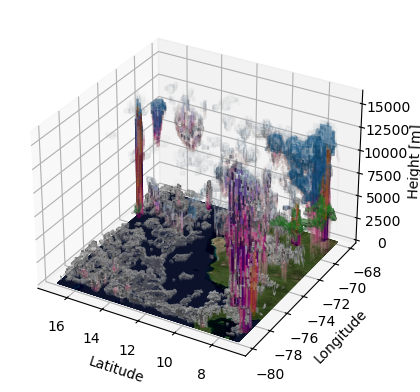

In [48]:
fig, ax = plt.subplots(subplot_kw=dict(projection="3d", computed_zorder=False))
ax.plot_surface(
    *np.meshgrid(bg_lats, bg_lons, indexing="ij"), 
    np.zeros(bg_image.shape[:-1]), 
    rstride=1, cstride=1, 
    facecolors=bg_image**0.6,
    zorder=0
)
ax.set_xlabel("Latitude")
ax.set_ylabel("Longitude")
ax.set_zlabel("Height [m]")
ax.invert_xaxis()

voxels = np.zeros(cli.shape)
voxel_colours = np.zeros((4,) + cli.shape)
voxel_colours_cli = voxel_colours.copy()
voxel_colours_clw = voxel_colours.copy()
voxel_colours_precip = voxel_colours.copy()

voxels[cli>1e-6] = 1
voxel_colours_cli[:, cli>1e-6] += cli_cmap(np.clip((np.log10(cli[cli>1e-6])+6)/3, 0, 1)).T

voxels[clw>1e-6] = 1
voxel_colours_clw[:, clw>1e-6] += clw_cmap(np.clip((np.log10(clw[clw>1e-6])+6)/3, 0, 1)).T

voxels[precip>1e-6] = 1
voxel_colours_precip[:, precip>1e-6] += precip_cmap(np.clip((np.log10(precip[precip>1e-6])+6)/3, 0, 1)).T

voxel_colours[-1] = voxel_colours_cli[-1] + voxel_colours_clw[-1] + voxel_colours_precip[-1]
voxel_colours[:-1] = (
    voxel_colours_cli[:-1] * voxel_colours_cli[-1] 
    + voxel_colours_clw[:-1] * voxel_colours_clw[-1] 
    + voxel_colours_precip[:-1] * voxel_colours_precip[-1]
) / voxel_colours[-1]

voxel_colours = voxel_colours.transpose(1,2,3,0)
voxel_colours = np.clip(voxel_colours, 0, 1)

clouds_vox = ax.voxels(
    vox_lats, vox_lons, vox_h, voxels, 
    facecolors=voxel_colours,
    zorder=1
)

labels_vox = ax.voxels(
    vox_lats, vox_lons, vox_h, label_voxels, 
    facecolors=label_voxel_colours,
    zorder=1, alpha=0.25
)

In [49]:
label_voxels = np.zeros(ds.core.isel(time=36).shape)
label_voxel_colours = np.empty(label_voxels.shape, dtype=object)

wh_system = ds.system.isel(time=36).values > 0
label_voxels[wh_system] = 1
label_voxel_colours[wh_system] = "C01"

wh_anvil = ds.anvil.isel(time=36).values > 0
label_voxels[wh_anvil] = 1
label_voxel_colours[wh_anvil] = "C00"

wh_core = ds.core.isel(time=36).values > 0
label_voxels[wh_core] = 1
label_voxel_colours[wh_core] = "C03"

label_voxels = label_voxels.transpose(1,2,0)
label_voxel_colours = label_voxel_colours.transpose(1,2,0)


/tmp/ipykernel_458618/3679296315.py:47: RuntimeWarning: invalid value encountered in divide
  voxel_colours[:-1] = (


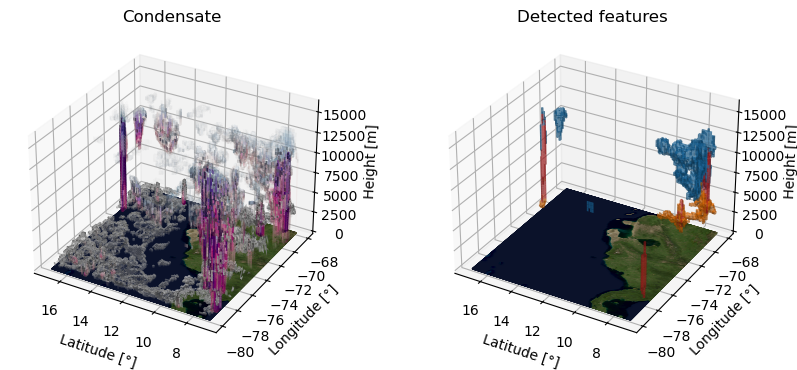

In [50]:
fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(9.6, 4.8), 
    subplot_kw=dict(projection="3d", computed_zorder=False)
)
ax1.plot_surface(
    *np.meshgrid(bg_lats, bg_lons, indexing="ij"), 
    np.zeros(bg_image.shape[:-1]), 
    rstride=1, cstride=1, 
    facecolors=bg_image**0.6,
    zorder=0
)
ax1.set_xlabel("Latitude [°] ")
ax1.set_ylabel("Longitude [°]")
ax1.set_zlabel("Height [m]")
ax1.set_title("Condensate")
ax1.invert_xaxis()

ax2.plot_surface(
    *np.meshgrid(bg_lats, bg_lons, indexing="ij"), 
    np.zeros(bg_image.shape[:-1]), 
    rstride=1, cstride=1, 
    facecolors=bg_image**0.6,
    zorder=0
)
ax2.set_xlabel("Latitude [°]")
ax2.set_ylabel("Longitude [°]")
ax2.set_zlabel("Height [m]")
ax2.set_title("Detected features")
ax2.invert_xaxis()

voxels = np.zeros(cli.shape)
voxel_colours = np.zeros((4,) + cli.shape)
voxel_colours_cli = voxel_colours.copy()
voxel_colours_clw = voxel_colours.copy()
voxel_colours_precip = voxel_colours.copy()

voxels[cli>1e-6] = 1
voxel_colours_cli[:, cli>1e-6] += cli_cmap(np.clip((np.log10(cli[cli>1e-6])+6)/3, 0, 1)).T

voxels[clw>1e-6] = 1
voxel_colours_clw[:, clw>1e-6] += clw_cmap(np.clip((np.log10(clw[clw>1e-6])+6)/3, 0, 1)).T

voxels[precip>1e-6] = 1
voxel_colours_precip[:, precip>1e-6] += precip_cmap(np.clip((np.log10(precip[precip>1e-6])+6)/3, 0, 1)).T

voxel_colours[-1] = voxel_colours_cli[-1] + voxel_colours_clw[-1] + voxel_colours_precip[-1]
voxel_colours[:-1] = (
    voxel_colours_cli[:-1] * voxel_colours_cli[-1] 
    + voxel_colours_clw[:-1] * voxel_colours_clw[-1] 
    + voxel_colours_precip[:-1] * voxel_colours_precip[-1]
) / voxel_colours[-1]

voxel_colours = voxel_colours.transpose(1,2,3,0)
voxel_colours = np.clip(voxel_colours, 0, 1)

clouds_vox = ax1.voxels(
    vox_lats, vox_lons, vox_h, voxels, 
    facecolors=voxel_colours,
    zorder=1
)

labels_vox = ax2.voxels(
    vox_lats, vox_lons, vox_h, label_voxels, 
    facecolors=label_voxel_colours,
    zorder=1, alpha=0.5
)

plt.subplots_adjust(wspace=0.3)

In [51]:
ax1.get_position().bounds

(0.125, 0.1580434782608695, 0.3369565217391305, 0.673913043478261)

Text(0.15869565217391304, 0.8319565217391305, 'ICON condensate and tracked features: 2021-07-01T09:15:00')

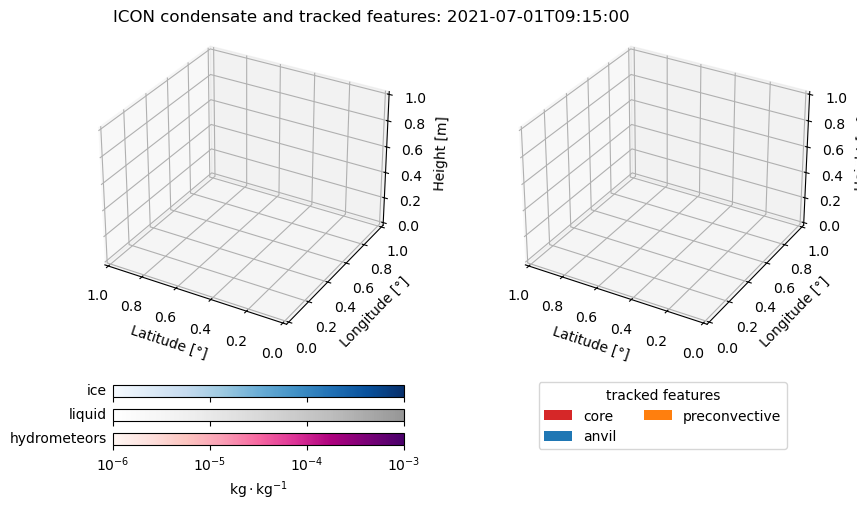

In [70]:
fig, (_ax1, _ax2) = plt.subplots(
    1, 2, figsize=(9.6, 4.8), 
    subplot_kw=dict(projection="3d", computed_zorder=False)
)
_ax1.set_xlabel("Latitude [°] ")
_ax1.set_ylabel("Longitude [°]")
_ax1.set_zlabel("Height [m]")
# _ax1.set_title("Condensate")
_ax1.invert_xaxis()

_ax2.set_xlabel("Latitude [°]")
_ax2.set_ylabel("Longitude [°]")
_ax2.set_zlabel("Height [m]")
# _ax2.set_title("Detected features")
_ax2.invert_xaxis()

plt.subplots_adjust(wspace=0.3)

from matplotlib.colorbar import ColorbarBase
from matplotlib import patches

ax1_bounds = list(ax1.get_position().bounds)
ax1_bounds[0] = ax1_bounds[0] + ax1_bounds[2] * 0.1
ax1_bounds[2] = ax1_bounds[2] * 0.9

cax = fig.add_axes([ax1_bounds[0], 0.05, ax1_bounds[2], 0.025])
cbar = ColorbarBase(cax, cmap=cli_cmap, orientation = 'horizontal')
cbar.set_ticks(np.linspace(0,1,4), labels=["", "", "", ""])
cbar.ax.set_ylabel("ice", rotation=0, ha="right", va="center")

cax = fig.add_axes([ax1_bounds[0], 0, ax1_bounds[2], 0.025])
cbar = ColorbarBase(cax, cmap=clw_cmap, orientation = 'horizontal')
cbar.set_ticks(np.linspace(0,1,4), labels=["", "", "", ""])
cbar.ax.set_ylabel("liquid", rotation=0, ha="right", va="center")

cax = fig.add_axes([ax1_bounds[0], -0.05, ax1_bounds[2], 0.025])
cbar = ColorbarBase(cax, cmap=precip_cmap, orientation = 'horizontal')
cbar.ax.set_ylabel("hydrometeors", rotation=0, ha="right", va="center")
cbar.set_ticks(np.linspace(0,1,4), labels=[r"$10^{-6}$", r"$10^{-5}$", r"$10^{-4}$", r"$10^{-3}$"])
cbar.set_label(r"$\mathrm{kg \cdot kg^{-1}}$")

ax2_bounds = list(ax2.get_position().bounds)

fig.legend(
    [patches.Rectangle((0,0), 1, 1, fc="C03"), patches.Rectangle((0,0), 1, 1, fc="C00"), patches.Rectangle((0,0), 1, 1, fc="C01")],
    ["core", "anvil", "preconvective"],
    title="tracked features", 
    ncol=2, loc="center",
    bbox_to_anchor=(ax2_bounds[0] + 0.5 * ax2_bounds[2], 0.01)
)

fig.text(
    ax1_bounds[0],ax1_bounds[1] + ax1_bounds[3], 
    f'ICON condensate and tracked features: {str(ds.time.isel(time=36).values.astype("datetime64[s]"))}', 
    ha="left", fontsize=12
)



In [69]:
ax1_bounds

[0.15869565217391304,
 0.1580434782608695,
 0.3032608695652175,
 0.673913043478261]

In [60]:
str(ds.time.isel(time=36).values.astype("datetime64[s]"))

'2021-07-01T09:15:00'

/tmp/ipykernel_458618/251785096.py:47: RuntimeWarning: invalid value encountered in divide
  voxel_colours[:-1] = (


Text(0.145, 0.8472727272727272, 'ICON/NextGEMS cycle 4 condensate and tracked features: 2021-07-01T09:15:00')

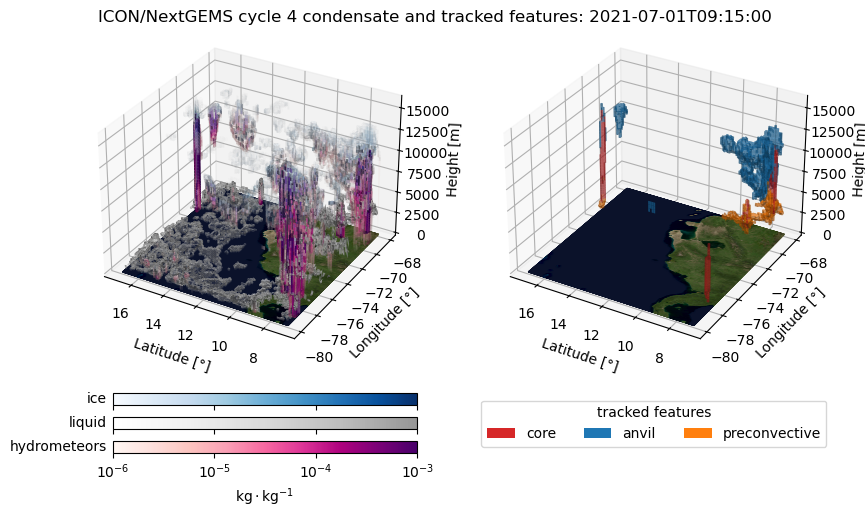

In [80]:
fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(9.6, 4.8), 
    subplot_kw=dict(projection="3d", computed_zorder=False)
)
ax1.plot_surface(
    *np.meshgrid(bg_lats, bg_lons, indexing="ij"), 
    np.zeros(bg_image.shape[:-1]), 
    rstride=1, cstride=1, 
    facecolors=bg_image**0.6,
    zorder=0
)
ax1.set_xlabel("Latitude [°] ")
ax1.set_ylabel("Longitude [°]")
ax1.set_zlabel("Height [m]")
# ax1.set_title("Condensate")
ax1.invert_xaxis()

ax2.plot_surface(
    *np.meshgrid(bg_lats, bg_lons, indexing="ij"), 
    np.zeros(bg_image.shape[:-1]), 
    rstride=1, cstride=1, 
    facecolors=bg_image**0.6,
    zorder=0
)
ax2.set_xlabel("Latitude [°]")
ax2.set_ylabel("Longitude [°]")
ax2.set_zlabel("Height [m]")
# ax2.set_title("Detected features")
ax2.invert_xaxis()

voxels = np.zeros(cli.shape)
voxel_colours = np.zeros((4,) + cli.shape)
voxel_colours_cli = voxel_colours.copy()
voxel_colours_clw = voxel_colours.copy()
voxel_colours_precip = voxel_colours.copy()

voxels[cli>1e-6] = 1
voxel_colours_cli[:, cli>1e-6] += cli_cmap(np.clip((np.log10(cli[cli>1e-6])+6)/3, 0, 1)).T

voxels[clw>1e-6] = 1
voxel_colours_clw[:, clw>1e-6] += clw_cmap(np.clip((np.log10(clw[clw>1e-6])+6)/3, 0, 1)).T

voxels[precip>1e-6] = 1
voxel_colours_precip[:, precip>1e-6] += precip_cmap(np.clip((np.log10(precip[precip>1e-6])+6)/3, 0, 1)).T

voxel_colours[-1] = voxel_colours_cli[-1] + voxel_colours_clw[-1] + voxel_colours_precip[-1]
voxel_colours[:-1] = (
    voxel_colours_cli[:-1] * voxel_colours_cli[-1] 
    + voxel_colours_clw[:-1] * voxel_colours_clw[-1] 
    + voxel_colours_precip[:-1] * voxel_colours_precip[-1]
) / voxel_colours[-1]

voxel_colours = voxel_colours.transpose(1,2,3,0)
voxel_colours = np.clip(voxel_colours, 0, 1)

clouds_vox = ax1.voxels(
    vox_lats, vox_lons, vox_h, voxels, 
    facecolors=voxel_colours,
    zorder=1
)

labels_vox = ax2.voxels(
    vox_lats, vox_lons, vox_h, label_voxels, 
    facecolors=label_voxel_colours,
    zorder=1, alpha=0.5
)

plt.subplots_adjust(wspace=0.2)

ax1_bounds = list(ax1.get_position().bounds)
ax1_bounds[0] = ax1_bounds[0] + ax1_bounds[2] * 0.1
ax1_bounds[2] = ax1_bounds[2] * 0.9

cax = fig.add_axes([ax1_bounds[0], 0.05, ax1_bounds[2], 0.025])
cbar = ColorbarBase(cax, cmap=cli_cmap, orientation = 'horizontal')
cbar.set_ticks(np.linspace(0,1,4), labels=["", "", "", ""])
cbar.ax.set_ylabel("ice", rotation=0, ha="right", va="center")

cax = fig.add_axes([ax1_bounds[0], 0, ax1_bounds[2], 0.025])
cbar = ColorbarBase(cax, cmap=clw_cmap, orientation = 'horizontal')
cbar.set_ticks(np.linspace(0,1,4), labels=["", "", "", ""])
cbar.ax.set_ylabel("liquid", rotation=0, ha="right", va="center")

cax = fig.add_axes([ax1_bounds[0], -0.05, ax1_bounds[2], 0.025])
cbar = ColorbarBase(cax, cmap=precip_cmap, orientation = 'horizontal')
cbar.ax.set_ylabel("hydrometeors", rotation=0, ha="right", va="center")
cbar.set_ticks(np.linspace(0,1,4), labels=[r"$10^{-6}$", r"$10^{-5}$", r"$10^{-4}$", r"$10^{-3}$"])
cbar.set_label(r"$\mathrm{kg \cdot kg^{-1}}$")

ax2_bounds = list(ax2.get_position().bounds)

fig.legend(
    [patches.Rectangle((0,0), 1, 1, fc="C03"), patches.Rectangle((0,0), 1, 1, fc="C00"), patches.Rectangle((0,0), 1, 1, fc="C01")],
    ["core", "anvil", "preconvective"],
    title="tracked features", 
    ncol=3, loc="center",
    bbox_to_anchor=(ax2_bounds[0] + 0.5 * ax2_bounds[2], 0.01)
)

ax1_bounds = list(ax1.get_position().bounds)

fig.text(
    ax1_bounds[0]+0.02, ax1_bounds[1] + ax1_bounds[3], 
    f'ICON/NextGEMS cycle 4 condensate and tracked features: {str(ds.time.isel(time=36).values.astype("datetime64[s]"))}', 
    ha="left", fontsize=12
)


In [81]:
fig.savefig("3d_test.png", bbox_inches="tight")

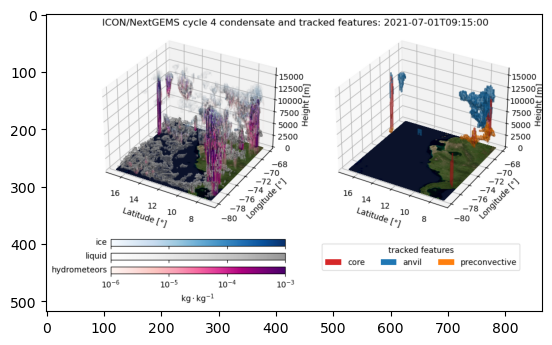

In [82]:
plt.imshow(plt.imread("3d_test.png"))